<a href="https://colab.research.google.com/github/bhumikaydv2006/WCTM-07/blob/main/car.csv.project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uplaoded = files.upload()


Saving CAR DETAILS FROM CAR DEKHO.csv to CAR DETAILS FROM CAR DEKHO.csv


In [5]:
import pandas as pd

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
display(df.head())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object


In [9]:
print(df.isnull())

       name   year  selling_price  km_driven   fuel  seller_type  \
0     False  False          False      False  False        False   
1     False  False          False      False  False        False   
2     False  False          False      False  False        False   
3     False  False          False      False  False        False   
4     False  False          False      False  False        False   
...     ...    ...            ...        ...    ...          ...   
4335  False  False          False      False  False        False   
4336  False  False          False      False  False        False   
4337  False  False          False      False  False        False   
4338  False  False          False      False  False        False   
4339  False  False          False      False  False        False   

      transmission  owner  
0            False  False  
1            False  False  
2            False  False  
3            False  False  
4            False  False  
...            

In [10]:
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [11]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4335    False
4336    False
4337    False
4338    False
4339    False
Length: 4340, dtype: bool


In [12]:
print(df.drop_duplicates(inplace=True))

None


In [13]:
print(df.shape)

(3577, 8)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
for col in df.select_dtypes(include='object').columns:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,602,2014,409999,80000,1,1,1,2
4336,601,2014,409999,80000,1,1,1,2
4337,777,2009,110000,83000,4,1,1,2
4338,381,2016,865000,90000,1,1,1,0


In [17]:
target_column= 'selling_price'

In [18]:
x=df.drop(target_column,axis=1)
y=df[target_column]
df


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,602,2014,409999,80000,1,1,1,2
4336,601,2014,409999,80000,1,1,1,2
4337,777,2009,110000,83000,4,1,1,2
4338,381,2016,865000,90000,1,1,1,0


In [19]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.0465849 , -1.40256584,  0.01575368, ...,  0.45738437,
         0.30912612, -0.70888558],
       [ 0.71648628, -1.40256584, -0.4046503 , ...,  0.45738437,
         0.30912612, -0.70888558],
       [-0.63339019, -0.22641758,  0.64635965, ...,  0.45738437,
         0.30912612, -0.70888558],
       ...,
       [ 0.05162175, -0.93210654,  0.28901627, ...,  0.45738437,
         0.30912612,  0.85731808],
       [-0.94567504,  0.71450103,  0.43615766, ...,  0.45738437,
         0.30912612, -0.70888558],
       [ 1.00106845,  0.71450103, -0.61485229, ...,  0.45738437,
         0.30912612, -0.70888558]])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
x_train

array([[ 1.65334085,  0.24404172,  1.38206662, ..., -1.95213535,
         0.30912612, -0.70888558],
       [-1.63320541,  0.94973068, -1.03525628, ...,  0.45738437,
         0.30912612,  0.85731808],
       [-0.83486429, -1.40256584, -0.19444831, ...,  0.45738437,
         0.30912612,  0.07421625],
       ...,
       [ 0.55782543,  1.18496033, -0.4046503 , ...,  0.45738437,
         0.30912612, -0.70888558],
       [ 0.54271487,  0.94973068, -0.71995329, ...,  0.45738437,
         0.30912612, -0.70888558],
       [-0.98093301, -0.22641758, -0.04730692, ..., -1.95213535,
         0.30912612,  0.85731808]])

In [24]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)

Mean Squared Error: 149899718969.2738
R2 Score: 0.5346656380779118


In [30]:
y_pred = rf_model.predict(x_test)
y_pred

array([ 412550.        ,  480949.98      , 1078199.78      ,
       1509989.99      ,  193230.        ,  291119.87      ,
        156100.        ,  627800.        ,  986689.83      ,
        357149.99      ,  148150.        ,  370319.98      ,
        710999.97      ,  238399.7       ,  368110.        ,
        542639.99      ,  438709.96      , 1164350.        ,
        322579.98      ,  319019.95      ,  154009.84      ,
        306949.89      ,   90720.        ,  559829.98      ,
        342350.        ,  505370.        ,  400680.        ,
        634019.99      ,  411949.95      ,  153809.92      ,
        532120.        ,  151954.        ,  103647.33333333,
        512000.        ,  267749.99      ,  184400.        ,
        360349.89      ,  254399.99      ,  617400.        ,
       1344100.        ,  803209.99      ,  145750.        ,
        701600.        ,  552399.97      ,  531827.60904762,
        240969.97      ,  292629.89      ,  275550.        ,
        224156.66666667,

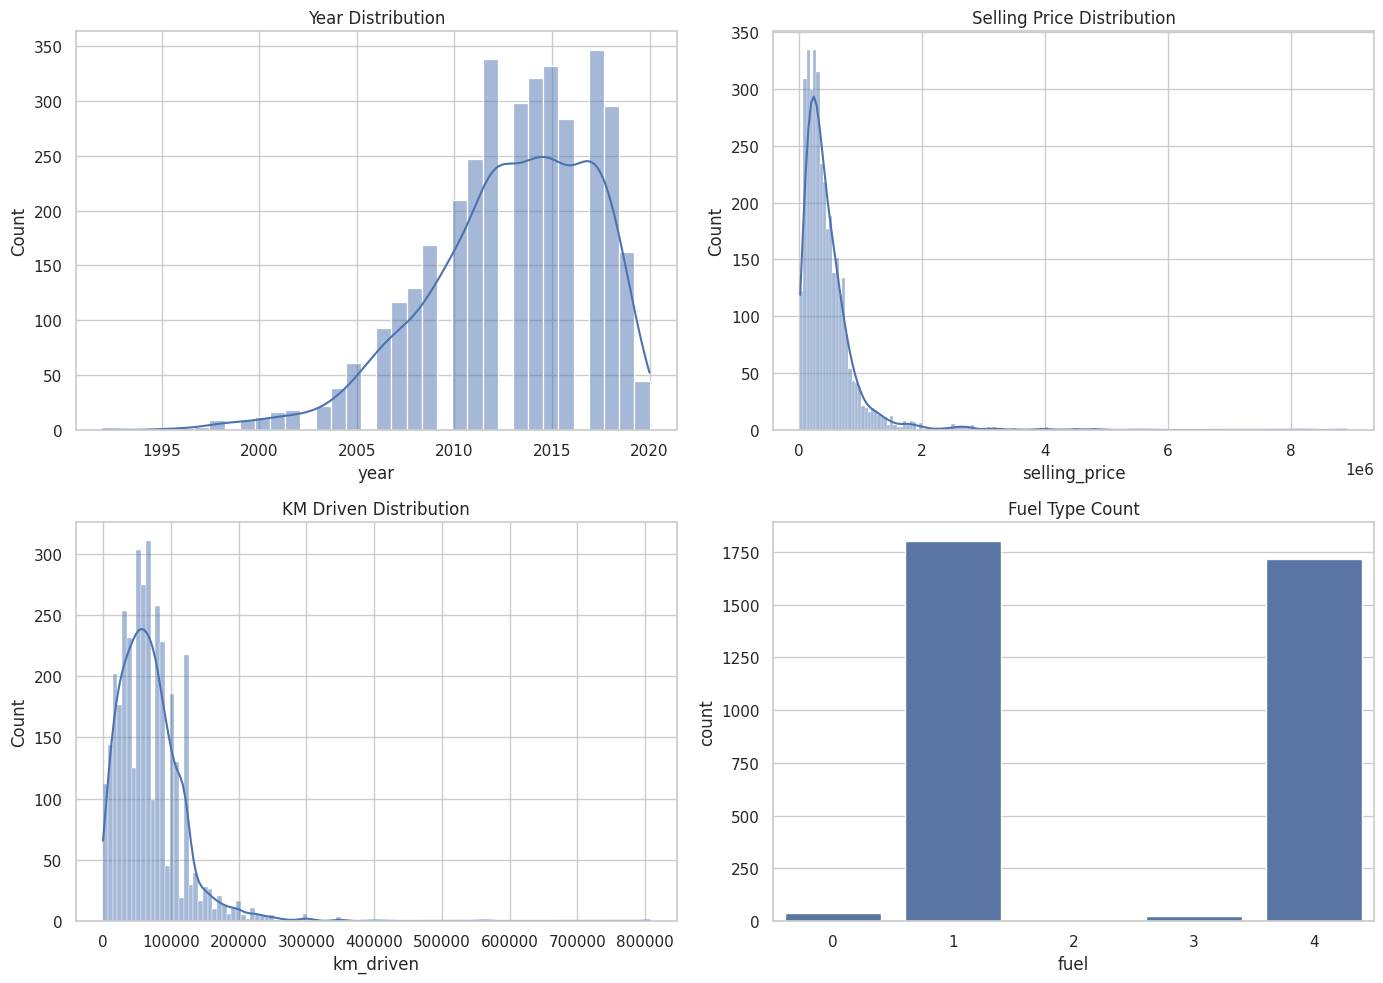

In [31]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['year'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Year Distribution')
sns.histplot(df['selling_price'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Selling Price Distribution')
sns.histplot(df['km_driven'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('KM Driven Distribution')
sns.countplot(data=df, x='fuel', ax=axes[1, 1])
axes[1, 1].set_title('Fuel Type Count')
plt.tight_layout()
plt.show()

In [32]:
df_processed = df.drop(['name'], axis=1).copy()
label_encoders = {}
for col in df_processed.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

In [33]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

NameError: name 'scaled_data' is not defined

In [35]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca


PCA(n_components=2)

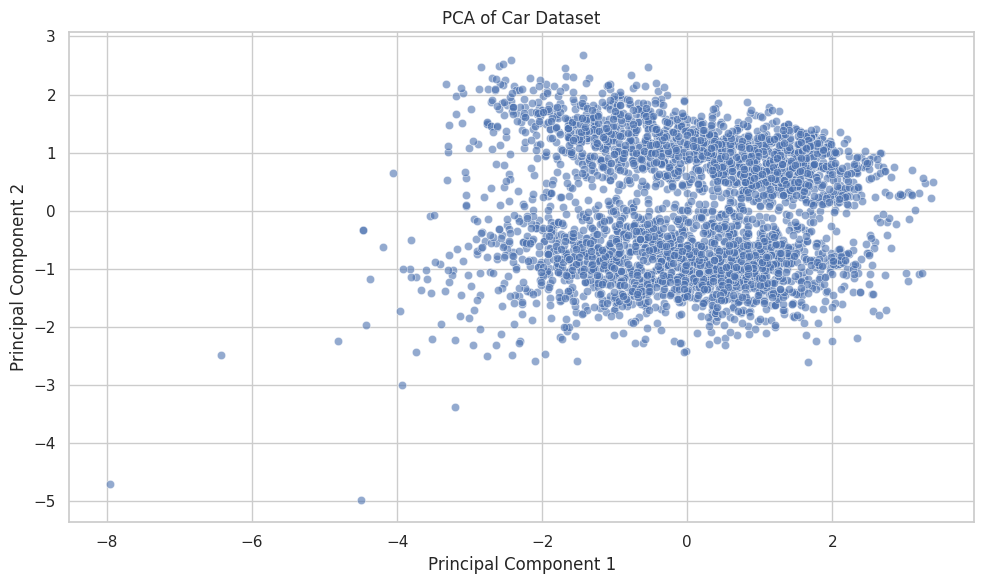

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.6)
plt.title('PCA of Car Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.27188397 0.17175177]
